# Showcase 1 - Thursday 31.08
#### Generation/analysis/validation of data

## Generation of data

### Cosmological parameters
Created with the gevolution code with the following cosmological parameters:

* $h = 0.67556$
* $\Omega_b = 0.022032$
* $\Omega_\mathrm{CDM} = 0.12038$
* $T_\mathrm{CMB} = 2.7255$ [K]
* $N_{ur} = 3.046$

### Primordial power spectrum
* $k_{piv} = 0.05$ [Mpc $^{-1}$ ]
* $A_s = 2.215\cdot10^{-9}$
* $n_s = 0.9619$

### Simulation parameters
* $z_{ini} = 100$:   initial redshfit
* $L=5120$ [Mpc/h]:    boxsize
* $N_{grid} = 256$ [px]:  number of grid points/pixels per dimension
* $\Delta_{res} = L/N_{grid} = 20$ [Mpc/px]: Resolution
* Courant factor $=48$
* Time step limit $=0.04$

### Seeds
The simulations are run with for digit seeds, $S$, starting from $0000$ in increments of one. When writing this the dataset consist of $2000$ simulations, so the seeds: $S\in[0000,2000)$.

### Running the simulations
So, I say _one_ simulation per seed, meaning _one_ simulations consists of _two_ gevolution runs, where the only changed parameter is the gravity theory (GR or Newton). For _each_ gevolution run I output *three* quantities:
* Snapshots of potential $\phi$ of three-dimensional datacubes: $\mathcal{D}(S, z_d)$ as function of seed and redshift.
* Power spectra of potential $\phi$: $P_\phi(k)$, one for each seed and redshift $z_p$.
* Power spectra of matter contrast $\delta$: $P_\delta(k)$, one for each seed and redshift $z_p$. 

### Output
The output of the data are all functions of seed and redshift. The redshifts for which datacubes are written are: $$z_d\in[20,15,10,5,1,0],$$ and for which power spectra are written: $$z_p\in[100,50,20,15,10,6,5,4,3,2,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0].$$
The seed range used is: $S\in[0000,2000)$ or alternatively $\{S\in\mathbb{Z}\;|\;0\leq S<2000\}$

I choose to denote the data cubes as 
* $\mathcal{D}(S, z_d)$,

and the power spectrum data (the data, not the actuall power spectra which are functions of $k$) 
* $\mathcal{P}_\phi(S, z_p)$
* $\mathcal{P}_\delta(S, z_p)$.

## Analysis and validation of data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotPS as pps 
from figure import CustomFigure

Some information about the boxes and limiting frequencies:

In [2]:
boxsize = 5120 #Mpc
ngrid = 256 #px
resolution = boxsize/ngrid #Mpc/px
k_nyquist = np.pi / resolution 
k_boxsize = 2*np.pi/boxsize

I will denote the power spectra outputed by gevolution with a superscript $gev$, by class with $cls$ and camb $cmb$. Thus, we have the following quantities:

* $P_\delta^{gev}(k)$ -> Matter power spectrum from gevolution
* $P_\delta^{CLASS}(k)$ -> Matter power spectrum from CLASS
* $P_\delta^{CAMB}(k)$ -> Matter power spectrum from CAMB
* $P_\phi^{gev}(k)$ -> Potential power spectrum from gevolution
* $P_\phi(k)$ -> Potential power spectrum directly calculated from the datacube, using Pylians

We start off with plotting the matter power spectra generated by gevolution itself, $P_\delta^{gev}(k)$, for three different seeds and at three different redshifts, namely $z\in[0,1,10]$

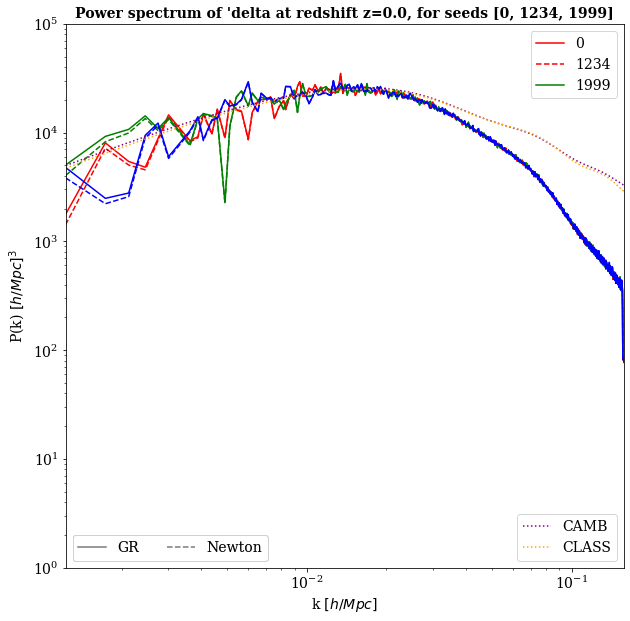

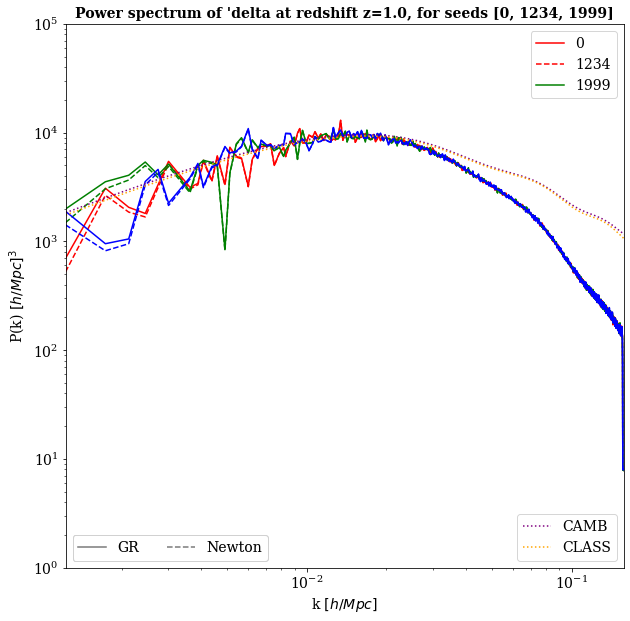

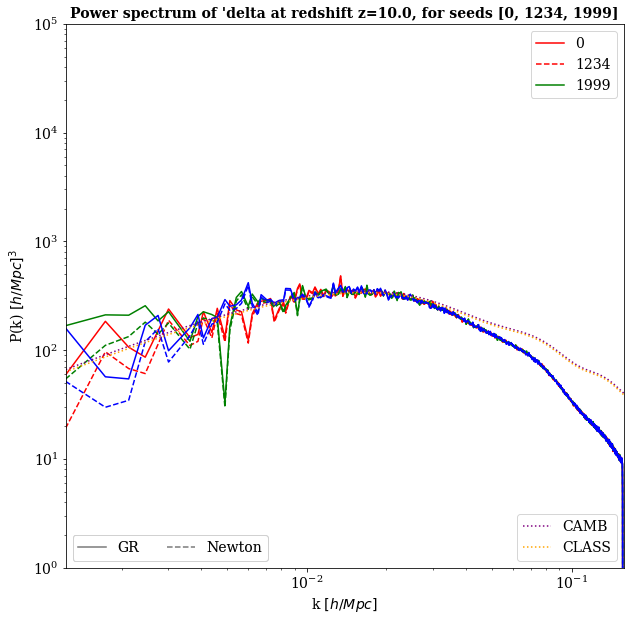

In [3]:
datapath = "/mn/stornext/d10/data/johanmkr/simulations/gevolution_first_runs/"

seeds = [0000, 1234, 1999]
pk_type = "delta" 
redshift = 0
add_objects = [pps.AddPowerSpectraComponents(datapath +f"seed{seeds[i]:04d}/") for i in range(len(seeds))]

def compare_seeds(ps_objects, pk_type, redshift):
    temp_fig = CustomFigure()
    colors = ["r", "g", "b"]
    settings = {
            "xscale": "log",
            "yscale": "log",
            "xlabel": r"k $[h/Mpc]$",
            "ylabel": r"P(k) $[h/Mpc]^3$",
            "title": f"Power spectrum of '{pk_type} at redshift z={redshift:.1f}, for seeds {seeds}",
            "xlim": (k_boxsize, k_nyquist),
            "ylim": (1e0, 1e5)
        }
    temp_fig.set_settings(settings)
    lines = []
    for i in range(len(ps_objects)):
        lines.extend(add_objects[i].add_gr_newton_gev(pk_type=pk_type, redshift=redshift, color=colors[i]))

    
    lines.append(add_objects[0].add_CAMB_spectrum(redshift, color="purple"))
    lines.append(add_objects[0].add_CLASS_spectrum(redshift, color="orange"))

    for line in lines:
        temp_fig.ax.add_line(line)

    leg1 = temp_fig.ax.legend(handles=lines[:6], labels=seeds, loc="upper right")
    leg2 = temp_fig.ax.legend(handles=lines[6:], labels=["CAMB", "CLASS"], loc="lower right")
    temp_fig.ax.add_artist(leg1)
    temp_fig.ax.add_artist(leg2)
    add_objects[0]._add_gr_newton_legend(temp_fig.ax)


compare_seeds(add_objects, "delta", redshift=0)
compare_seeds(add_objects, "delta", redshift=1)
compare_seeds(add_objects, "delta", redshift=10)


We can plot the same for the potential, but now 